# Ejercicio 1

Desarrolle un método para generar una variable aleatoria con las siguientes densidades:

**a)**
\begin{equation*}
f(x) =
\begin{cases}
\displaystyle \frac{x - 2}{2} & \text{si } 2 \leq x \leq 3, \\
\displaystyle \frac{2 - x/3}{2} & \text{si } 3 \leq x \leq 6, \\
0 & \text{en otro caso}.
\end{cases}
\end{equation*}


In [11]:
#Módulos y librerías
from random import random
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Simulación
def F() -> float:
    U = random()
    if U < 1/4:
        x = 2 + 2 * sqrt(U)
    else:
        x = 6 - 6 * sqrt((1-U)/2)
    return x

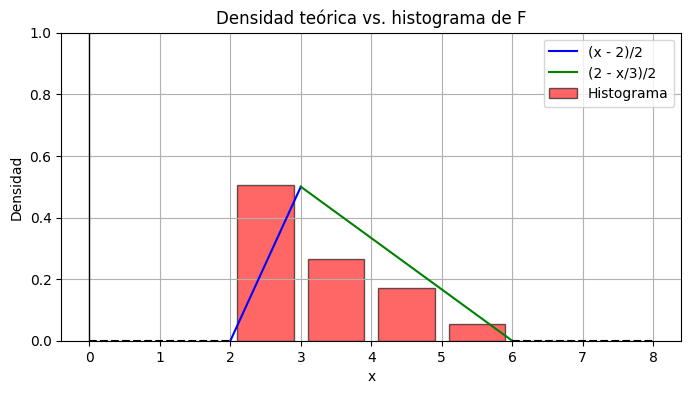

In [38]:

#Densidad de probabilidad

x2_3 = np.linspace(2, 3, 100) #Espaciados por tramo para simular suavitud
x3_6 = np.linspace(3, 6, 100)
x_left = np.linspace(0, 2, 100)
x_right = np.linspace(6, 8, 100)

#Función definida de a partes
f_0 = np.zeros_like(x_left)
f_1 = ((x2_3 - 2) / 2)
f_2 = ((2 - (x3_6 / 3)) / 2)
f_3 = np.zeros_like(x_right)


#Función de acumulada
F_accum = [F()  for _ in range(10_000)]
bins = [2, 3, 4, 5, 6, 7] #Para bins el último es excluyente

counts, edges = np.histogram(F_accum, bins=bins)

# Normalizar el histograma para obtener densidad
n = len(F_accum)
bin_width = np.diff(bins)  # [1, 1, 1, 1, 1]
densities = counts / (n * bin_width)  # Probabilidad por unidad

# Puntos centrales de cada barra
x_bar = [2.5, 3.5, 4.5, 5.5, 6.5]

# Graficar
plt.figure(figsize=(8, 4))

# Densidad teórica
plt.plot(x_left, f_0, '--', color='black')
plt.plot(x2_3, f_1, label='(x - 2)/2', color='blue')
plt.plot(x3_6, f_2, label='(2 - x/3)/2', color='green')
plt.plot(x_right, f_3, '--', color='black')

# Histograma normalizado (densidad)
plt.bar(x_bar, densities, width=0.8, align='center',
        color='red', edgecolor='black', alpha=0.6, label='Histograma')

# Estilo
plt.title('Densidad teórica vs. histograma de F')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.grid(True)
plt.legend()
plt.axvline(0, color='black', linewidth=1)
plt.ylim(0, 1)

plt.show()

**b)**
\begin{equation*}
f(x) = 
\begin{cases}
\frac{6(x + 3)}{35} & \text{si } 0 \leq x \leq 1 \\\\
\frac{6x^2}{35} & \text{si } 1 \leq x \leq 2 \\\\
0 & \text{en otro caso}
\end{cases}
\end{equation*}

Para encontrar F debemos aplicar el método de la *transformada inversa*.
Para ello, primero debemos encontrar F(x) y luego despejar x en función de u.

Por otro lado, tenemos que 
\begin{equation*}
F(x) = \int_{-\infty}^{x} f(t) dt
\end{equation*}

Entonces veamos por casos

- Si $x \leq 0$:

\begin{equation*}
F(x) = \int_{-\infty}^{x} f(t) dt = 0 
\end{equation*}

- Si $0 \leq x \leq 1  $
\begin{align*}
        F(x) &= \int_{-\infty}^{x} f(t) dt \\
             &= \int_{0}^{x} f(t) dt
\end{align*}